**PipeLine**
 - EDA
 - Feature Engeneering
 - Preprocessing
 - Modelling
 - Interpretation
 - Submit
 - Refactoring

**Загрузка необходимых библиотек**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install patool
import patoolib                       

%matplotlib inline

     |████████████████████████████████| 77 kB 4.2 MB/s 


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/my_drive')

Mounted at /content/my_drive


In [5]:
# Разархивируем архив
patoolib.extract_archive('/content/my_drive/MyDrive/DataSets/Pump_it_Up.rar', outdir='/content' )

patool: Extracting /content/my_drive/MyDrive/DataSets/Pump_it_Up.rar ...
patool: running /usr/bin/unrar x -- /content/my_drive/MyDrive/DataSets/Pump_it_Up.rar
patool:     with cwd='/content'
patool: ... /content/my_drive/MyDrive/DataSets/Pump_it_Up.rar extracted to `/content'.


'/content'

Загружаем все датасеты

In [6]:
data_train  = pd.read_csv('/content/Pump_it_Up/x_train.csv')
data_labels = pd.read_csv('/content/Pump_it_Up/y_train.csv')
data_test   = pd.read_csv('/content/Pump_it_Up/x_test.csv')

#EDA

## Data Review

In [7]:
data_train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [8]:
# резервная копия на случай отката
data_copy = data_train.copy()

In [9]:
data_all = data_copy

Объединим обучающий и тестовый датасеты для одновременной работы с данными на обоих

In [10]:
data_train['labels']  = True 
data_test['labels']   = False
data_all = pd.concat([data_train, data_test])

Просматриваем общую информацию

In [11]:
data_all.info

<bound method DataFrame.info of           id  amount_tsh  ... waterpoint_type_group labels
0      69572      6000.0  ...    communal standpipe   True
1       8776         0.0  ...    communal standpipe   True
2      34310        25.0  ...    communal standpipe   True
3      67743         0.0  ...    communal standpipe   True
4      19728         0.0  ...    communal standpipe   True
...      ...         ...  ...                   ...    ...
14845  39307         0.0  ...    communal standpipe  False
14846  18990      1000.0  ...             hand pump  False
14847  28749         0.0  ...    communal standpipe  False
14848  33492         0.0  ...    communal standpipe  False
14849  68707         0.0  ...    communal standpipe  False

[74250 rows x 41 columns]>

Определяем доли пропущенных значений для каждого атрибута (фичи)

In [12]:
(data_all.isna().sum()/data_all.shape[0]).sort_values(ascending=False)

scheme_name              0.474855
scheme_management        0.065266
installer                0.061037
funder                   0.060660
public_meeting           0.055960
permit                   0.051084
subvillage               0.006330
ward                     0.000000
lga                      0.000000
district_code            0.000000
region_code              0.000000
region                   0.000000
num_private              0.000000
basin                    0.000000
wpt_name                 0.000000
latitude                 0.000000
longitude                0.000000
gps_height               0.000000
date_recorded            0.000000
amount_tsh               0.000000
population               0.000000
labels                   0.000000
recorded_by              0.000000
water_quality            0.000000
waterpoint_type          0.000000
source_class             0.000000
source_type              0.000000
source                   0.000000
quantity_group           0.000000
quantity      

Смотрим какой тип значений содержит каждый атрибут

In [13]:
data_all.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

## Feature Engeneering

In [14]:
# Список имен всех атрибутов
data_all.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'labels'],
      dtype='object')

### Attribute 'ID'

In [15]:
data_all.id.value_counts()

2047     1
72310    1
14994    1
12947    1
2708     1
        ..
19811    1
30052    1
32101    1
25958    1
0        1
Name: id, Length: 74250, dtype: int64

In [16]:
data_all.id.value_counts().sum()

74250

In [34]:
'''
ЗАМЕТКА:
Атрибут ID не несет в себе никакой полезной информации, т.к. это
просто индетификатор и он будет удален
'''
print()

### Attribute 'amount_tsh'

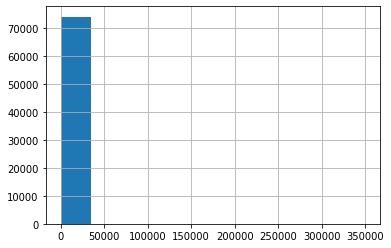

In [18]:
data_all.amount_tsh.hist()

In [19]:
data_all.amount_tsh.value_counts(normalize=True).iloc[:10]

0.0       0.700997
500.0     0.052175
50.0      0.041791
1000.0    0.025024
20.0      0.024404
200.0     0.020418
100.0     0.013926
10.0      0.013401
30.0      0.012512
2000.0    0.011879
Name: amount_tsh, dtype: float64

Видно, что очень много нулевых значений

In [22]:
'''
Создадим новый категориальный атрибут, где 
True  - нулевые значения атрибута родителя
False - НЕнулевые значения атрибута родителя

'''

data_all['amount_tsh_bool'] = data_all.amount_tsh == 0

In [23]:
data_all.amount_tsh_bool.value_counts(normalize=True)

True     0.700997
False    0.299003
Name: amount_tsh_bool, dtype: float64

### Attributes 'date_recorded' and 'construction_year'

In [24]:
 data_all.date_recorded.value_counts()

2011-03-17    695
2011-03-15    694
2013-02-03    684
2011-03-16    650
2011-03-14    649
             ... 
2011-09-20      1
2011-09-12      1
2011-09-22      1
2011-09-08      1
2012-01-25      1
Name: date_recorded, Length: 369, dtype: int64

In [25]:
#############################################
# переведем значения из object -> datetime64.
#############################################
data_all.date_recorded = pd.to_datetime(data_all.date_recorded) 


In [26]:
data_all.date_recorded.dt.year

0        2011
1        2013
2        2013
3        2013
4        2011
         ... 
14845    2011
14846    2011
14847    2013
14848    2013
14849    2013
Name: date_recorded, Length: 74250, dtype: int64

In [27]:
########################################################
# добавляем атрибуты 'year_recorded' и 'month_recorded'. 
########################################################

data_all['year_recorded']   = data_all.date_recorded.dt.year
data_all['month_recorded'] = data_all.date_recorded.dt.month

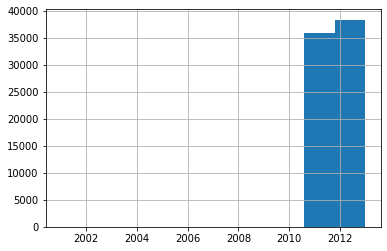

In [28]:
data_all.year_recorded.hist()

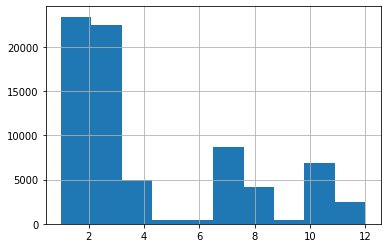

In [29]:
data_all.month_recorded.hist()

In [30]:
data_all.construction_year.value_counts()[:10]

0       25969
2010     3314
2008     3243
2009     3196
2000     2578
2007     1960
2006     1892
2011     1591
2003     1579
2004     1417
Name: construction_year, dtype: int64

In [31]:
'''
ЗАМЕТКА:
В construction_year очень много заглушек в виде нулей, поэтому
необходимо придумать метод, по которому будут заполняться
пробелы и заглушки атрибутов, в том числе и construction_year

'''
print()

### Attributes longitude, latitude, subvillage 

In [35]:
'''
ГИПОТЕЗА:
Вероятно, что состояние waterpoint (водоколонки) сильно зависит
от её географического месторасположения.
Атрибуты  longitude, latitude представляют из себя географическую долготу
и широту расположения конкретной водоколонки на карте 
Поэтому будет логично заполнять пропуски и заглушки атрибутов, 
отталкиваясь именно от расположения водоколонки.
ЗАДАЧИ:
 - определить есть ли пропуски/заглушки в longitude&latitude
 - заполнить их
 - по местоположению водоколонки заполнить пропуски/заглушки остальных атрибутов этой водоколонки
'''
print()

In [ ]:
data_all[['longitude', 'latitude']].head()

,longitude,latitude
0,34.938093,-9.856322
1,34.698766,-2.147466
2,37.460664,-3.821329
3,38.486161,-11.155298
4,31.130847,-1.825359


In [ ]:
data_all[['longitude', 'latitude']].isnull().sum()

longitude    0
latitude     0
dtype: int64

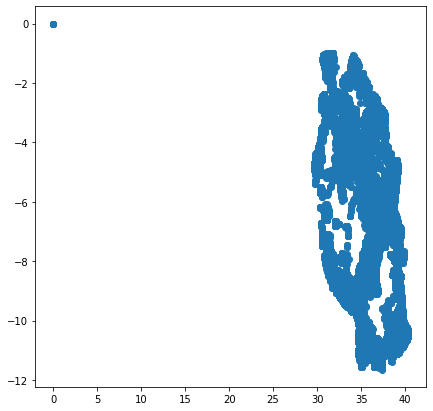

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(data_all.longitude, data_all.latitude)
plt.show()

In [36]:
'''
Видно, что некоторые значения находятся ВНЕ карты Танзании, что
связано с наличием заглушек в виде значений близких к нулю
Данные заглушки нужно попробовать заполнить осмысленными данными

ГИПОТЕЗА:
Недостающие значения координат longitude&latitude можно попробовать заполнить,
исходя из их пренадлежности к subvillage(деревне)
АЛГОРИТМ РЕШЕНИЯ:
 - берем водоколонку с заглушками по координатам
 - проверяем, что у неё есть subvillage
 - считаем среднее расположение по всем известным водоколонкам в данном subvillage
    важно: НЕ берем в расчет нулевые координаты!
 - записываем среднее значение расположения в longitude&latitude текущей водоколонки
'''
print()

In [37]:
data_all[data_all.longitude==0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,labels,amount_tsh_bool,year_recorded,month_recorded
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,unknown,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,True,True,2013,2
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,GeoData Consultants Ltd,VWC,Nyang'hwale,True,0,submersible,submersible,submersible,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,True,True,2011,8
168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,GeoData Consultants Ltd,Parastatal,NaN,False,0,gravity,gravity,gravity,parastatal,parastatal,other,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,True,2013,1
177,56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,other,other,other,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,True,True,2013,1
253,13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,True,True,2012,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14649,30454,0.0,2011-08-08,Nyamigogo,0,MASWI,0.0,-2.000000e-08,Husein,0,Lake Victoria,Nyaweshi,Mwanza,19,6,Geita,Kharumwa,0,True,GeoData Consultants Ltd,VWC,Borehole,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,False,True,2011,8
14676,44766,0.0,2013-02-16,Dwsp,0,DWE,0.0,-2.000000e-08,Imalanota,0,Lake Victoria,Busumabwi,Mwanza,17,1,Magu,Nkungulu,0,False,GeoData Consultants Ltd,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,False,True,2013,2
14766,56279,0.0,2012-11-04,Government Of Tanzania,0,RWE,0.0,-2.000000e-08,Ofisini,0,Lake Victoria,Madukani,Mwanza,19,2,Magu,Mkula,0,True,GeoData Consultants Ltd,VWC,Kalemela Water Supply,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,lake,river/lake,surface,communal standpipe multiple,communal standpipe,False,True,2012,11
14831,37994,0.0,2012-10-26,Hesawa,0,DWE,0.0,-2.000000e-08,Kwa Masilili,0,Lake Victoria,Solima A,Mwanza,19,2,Magu,Kabita,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,False,True,2012,10


In [38]:
data_all[data_all.latitude==-0.00000002]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,labels,amount_tsh_bool,year_recorded,month_recorded
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,unknown,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,True,True,2013,2
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,GeoData Consultants Ltd,VWC,Nyang'hwale,True,0,submersible,submersible,submersible,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,True,True,2011,8
168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,GeoData Consultants Ltd,Parastatal,NaN,False,0,gravity,gravity,gravity,parastatal,parastatal,other,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,True,True,2013,1
177,56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,other,other,other,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,True,True,2013,1
253,13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,True,True,2012,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14649,30454,0.0,2011-08-08,Nyamigogo,0,MASWI,0.0,-2.000000e-08,Husein,0,Lake Victoria,Nyaweshi,Mwanza,19,6,Geita,Kharumwa,0,True,GeoData Consultants Ltd,VWC,Borehole,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,False,True,2011,8
14676,44766,0.0,2013-02-16,Dwsp,0,DWE,0.0,-2.000000e-08,Imalanota,0,Lake Victoria,Busumabwi,Mwanza,17,1,Magu,Nkungulu,0,False,GeoData Consultants Ltd,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,False,True,2013,2
14766,56279,0.0,2012-11-04,Government Of Tanzania,0,RWE,0.0,-2.000000e-08,Ofisini,0,Lake Victoria,Madukani,Mwanza,19,2,Magu,Mkula,0,True,GeoData Consultants Ltd,VWC,Kalemela Water Supply,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,lake,river/lake,surface,communal standpipe multiple,communal standpipe,False,True,2012,11
14831,37994,0.0,2012-10-26,Hesawa,0,DWE,0.0,-2.000000e-08,Kwa Masilili,0,Lake Victoria,Solima A,Mwanza,19,2,Magu,Kabita,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,False,True,2012,10


In [41]:
'''
ЗАМЕТКИ:
 - Есть 2269 водоколонок с заглушками по координатам
 - У всех заполнен атрибут деревни
'''
print()

In [42]:
############################################################
# Получаем таблицу средних расположений водоколонок по деревням.
############################################################

average_coords_subvillage = data_all[data_all.longitude!=0].groupby('subvillage')[['longitude', 'latitude']].mean()

In [43]:
average_coords_subvillage

,longitude,latitude
subvillage,,
##,31.460087,-1.553813
'A' Kati,33.731741,-1.902525
1,32.986332,-2.455440
10C,32.170419,-4.677651
18,32.134800,-4.582413
...,...,...
Zumve,33.192803,-3.639579
Zunga,38.366623,-6.346883
Zunguni,38.837185,-7.144544


In [44]:
average_coords_subvillage.min()

longitude    29.609495
latitude    -11.560658
dtype: float64

In [45]:
average_coords_subvillage.max()

longitude    40.345193
latitude     -0.998464
dtype: float64

In [46]:
#################################
# Заполняем пропуски по деревням.
#################################

data_all.longitude[data_all.longitude==0] = data_all[data_all.longitude==0].subvillage.map(
    average_coords_subvillage['longitude']
)

data_all.latitude[data_all.latitude==-0.00000002] = data_all[data_all.latitude==-0.00000002].subvillage.map(
    average_coords_subvillage['latitude']
)

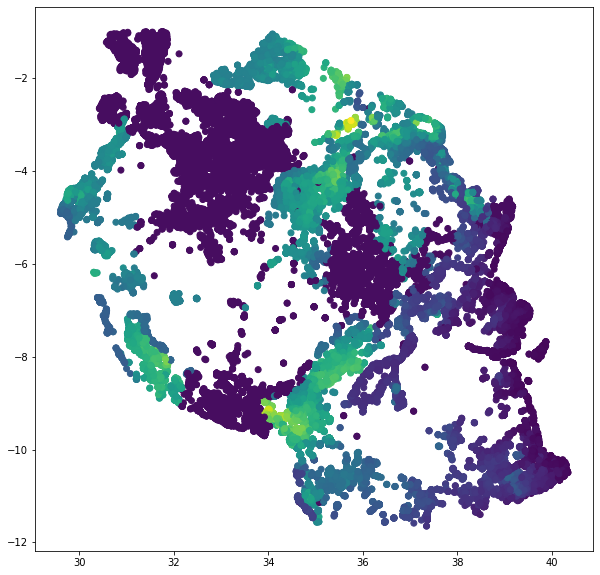

In [47]:
#################################################################
# Отображение всех водоколонок на карте Танзании, включая высоты.
#################################################################

plt.figure(figsize=(10,10))
plt.scatter(data_all.longitude, data_all.latitude, c=data_all.gps_height)
plt.show()

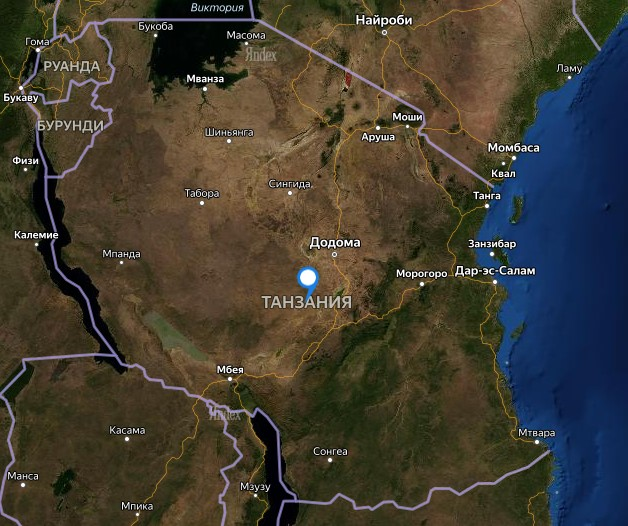

In [51]:
data_all.gps_height.value_counts()

 0       25649
-16         71
-15         69
-13         68
-19         65
         ...  
 2457        1
 2091        1
 2536        1
 2408        1
 2015        1
Name: gps_height, Length: 2456, dtype: int64

In [52]:
'''
ЗАМЕТКИ:
- Чем ближе к феолетовому, тем ближе высота точки к уровню моря (т.е. нулю)
- Чем ближе к желтому, тем выше точка над уровнем моря (т.е. нулю)
Видно, что очень много нулевых высот в горных месностях, что является
следствием установки заглушек в виде нулей в атрибуте 'gps_height'
Водоколонок с нулевыми значениями высоты - 25649
'''
print()

In [53]:
data_all.latitude.isna().sum()

1410

In [54]:
data_all.longitude.isna().sum()

1410

**Заметка:**

**Не все значения успешно заменились.**

**Большая часть из них превратилась в  NaN!!!**

In [55]:
average_coords_subvillage

,longitude,latitude
subvillage,,
##,31.460087,-1.553813
'A' Kati,33.731741,-1.902525
1,32.986332,-2.455440
10C,32.170419,-4.677651
18,32.134800,-4.582413
...,...,...
Zumve,33.192803,-3.639579
Zunga,38.366623,-6.346883
Zunguni,38.837185,-7.144544


In [56]:
subvillage_un = len(data_all.subvillage.unique())
print(f'Кол-во уникальных значений subvillage: {round(subvillage_un, 2)}')

Кол-во уникальных значений subvillage: 21426


In [57]:
'''
ЗАМЕТКИ:
Всего уникальных деревень - 21426
Деревень добавилось в average_coords_subvillage - 20617
809 деревень было удалено т.к. каждая из этих деревень:
 - содержала только одну водоколонку
 - эта водоколонка была с заглушкой по координатам
Поэтому фильтр и убрал данные деревни из расчета

ГИПОТЕЗА:
Для незаполнившихся занчений взять среднее расположение уже НЕ по деревне,
а по региону, к которому пренадлежит данная деревня
Данный способ менее точен, чем с деревнями, но более точен, чем брать
среднее по всей Танзании для всех пропусков.
'''
print()

In [58]:
data_all.region.value_counts()

Iringa           6599
Shinyanga        6293
Mbeya            5758
Kilimanjaro      5494
Morogoro         5038
Kagera           4174
Arusha           4111
Mwanza           3897
Kigoma           3533
Pwani            3331
Ruvuma           3306
Tanga            3186
Dodoma           2779
Singida          2536
Tabora           2466
Mara             2451
Rukwa            2242
Mtwara           2144
Manyara          1972
Lindi            1920
Dar es Salaam    1020
Name: region, dtype: int64

In [59]:
############################################################################
# Определяем в каких регионах есть водоколонки неопределенного расположения.
############################################################################

data_all[data_all.longitude.isna()].groupby('region')[['longitude', 'latitude']].mean()

,longitude,latitude
region,,
Mwanza,NaN,NaN
Shinyanga,NaN,NaN


In [60]:
################################################
# находим средние координаты для региона Mwanza.
################################################

condition = (~data_all.longitude.isna()) & (data_all.region == 'Mwanza')  # скобки важны!!!
av_Mwanza = data_all[condition].groupby('region')[['longitude', 'latitude']].mean()

In [61]:
av_Mwanza

,longitude,latitude
region,,
Mwanza,33.240344,-2.877543


In [62]:
###################################################
# находим средние координаты для региона Shinyanga.
###################################################

condition = (~data_all.longitude.isna()) & (data_all.region == 'Shinyanga')  # скобки важны!!!
av_Shinyanga = data_all[condition].groupby('region')[['longitude', 'latitude']].mean()

In [63]:
av_Shinyanga

,longitude,latitude
region,,
Shinyanga,33.330086,-3.587087


In [64]:
condition = (data_all.longitude.isna()) & (data_all.region == 'Mwanza')  # скобки важны!!!

In [65]:
print('Количество водоколонок для заполнения в Mwanza:', data_all[condition].shape[0])

Количество водоколонок для заполнения в Mwanza: 545


In [66]:
# Проверяем, что есть пропуски
data_all.longitude.isna().sum()

1410

In [67]:
########################################################
# Заполняем координаты для водоколонок в регионе Mwanza.
########################################################

data_all.longitude[data_all.longitude.isna()] = data_all[data_all.longitude.isna()].region.map(
    av_Mwanza['longitude'])

data_all.latitude[data_all.latitude.isna()] = data_all[data_all.latitude.isna()].region.map(
    av_Mwanza['latitude'])

In [68]:
# проверяем заполнение
print(data_all.longitude.isna().sum())
print(data_all.latitude.isna().sum())

865
865


In [69]:
###########################################################
# Заполняем координаты для водоколонок в регионе Shinyanga.
###########################################################

data_all.longitude[data_all.longitude.isna()] = data_all[data_all.longitude.isna()].region.map(
    av_Shinyanga['longitude'])

data_all.latitude[data_all.latitude.isna()] = data_all[data_all.latitude.isna()].region.map(
    av_Shinyanga['latitude'])

In [70]:
# проверяем заполнение
print(data_all.longitude.isna().sum())
print(data_all.latitude.isna().sum())

0
0


In [71]:
print(data_all.longitude.mean())
print(data_all.longitude.min())
print(data_all.longitude.max())

35.10331591553695
29.6071219
40.34519307


In [72]:
print(data_all.latitude.mean())
print(data_all.latitude.min())
print(data_all.latitude.max())

-5.817963866445396
-11.64944018
-0.99846435


### Filling gaps and stubs

Заполнять пробелы будем по методу К ближайших соседей (kNN)


Цель - научить классификатор по координатам предсказывать значения других атрибутов.

In [73]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

In [74]:
###########################################################
# Заполняем координаты для водоколонок в регионе Shinyanga.
###########################################################

def fill_values_with_knn(column_name, data_all=data_all, categorical=True):
  '''
  Функция:
  Заполняет значения NaN текущего атрибута по longitude&latitude согласно kNN

  Принимает:
  column_name - имя атрибута
  data_all - датафрейм
  categorical - флаг определяющий тип данных категориальные/числовые 

  '''

  if categorical:
    knn = KNeighborsClassifier(n_neighbors=5)
    le = LabelEncoder()
    data_all[f'{column_name}_encoded'] = le.fit_transform(data_all[column_name].astype(str)) # однако здесь все пропуски закодируются одинакого
                                                          
    y = data_all[f'{column_name}_encoded'] # столбец с закодированными значениями
  else:
    knn = KNeighborsRegressor(n_neighbors=5)
    y = data_all[column_name] # столбец с закодированными значениями

  X = data_all[['longitude', 'latitude']] # атрибуты для дтренировкм knn классификатора
  condition = (~data_all[column_name].isna()) & (data_all.labels==True)

  knn.fit(
    X=X[condition],
    y=y[condition]
)

  if categorical:
    data_all[f'{column_name}_encoded'][data_all[column_name].isna()] = knn.predict(
        X[data_all[column_name].isna()])
  else:
    data_all[column_name][data_all[column_name].isna()] = knn.predict(
        X[data_all[column_name].isna()])
        
  

**Заполнение 'gps_height'**

In [75]:
data_all.gps_height.value_counts()

 0       25649
-16         71
-15         69
-13         68
-19         65
         ...  
 2457        1
 2091        1
 2536        1
 2408        1
 2015        1
Name: gps_height, Length: 2456, dtype: int64

In [76]:
data_all.gps_height[data_all.gps_height==0] = np.NaN

In [77]:
data_all.gps_height.isna().sum()

25649

In [78]:
############################################
# Проверка функции заполнения на gps_height.
############################################

fill_values_with_knn('gps_height', categorical=False)

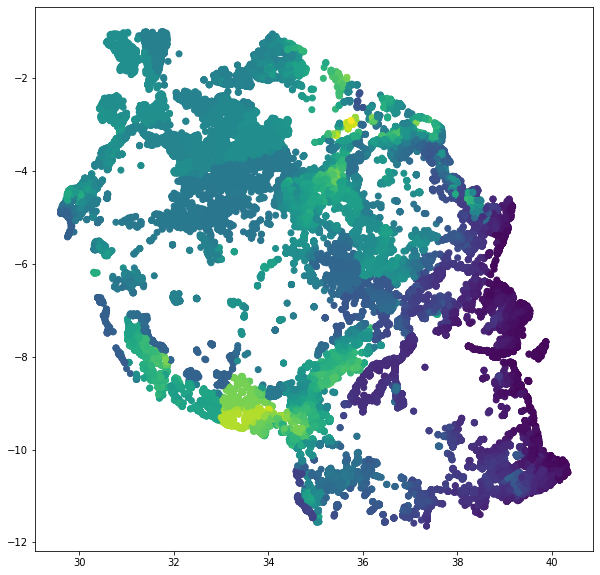

In [79]:
plt.figure(figsize=(10,10))
plt.scatter(data_all.longitude, data_all.latitude, c=data_all.gps_height)
plt.show()

In [80]:
# резервная копия на случай отката
data_copy = data_all.copy()

**Заполнение пропусков остальных атрибутов**

In [81]:
data_all = data_copy.copy()

In [82]:
# доля пропусков
(data_all.isna().sum()/data_all.shape[0]).sort_values(ascending=False)

scheme_name              0.474855
scheme_management        0.065266
installer                0.061037
funder                   0.060660
public_meeting           0.055960
permit                   0.051084
subvillage               0.006330
gps_height               0.000000
longitude                0.000000
latitude                 0.000000
wpt_name                 0.000000
num_private              0.000000
date_recorded            0.000000
region                   0.000000
region_code              0.000000
district_code            0.000000
lga                      0.000000
ward                     0.000000
population               0.000000
amount_tsh               0.000000
recorded_by              0.000000
basin                    0.000000
month_recorded           0.000000
year_recorded            0.000000
quantity                 0.000000
amount_tsh_bool          0.000000
labels                   0.000000
waterpoint_type_group    0.000000
waterpoint_type          0.000000
source_class  

In [83]:
# красивый Progress_board
from tqdm import tqdm_notebook

In [84]:
#################################
# Функция замены заглушек на NaN
#################################

fill_dict_cat_change = {
              # с заглушками
             'wpt_name'         :'none',      # класс none -> NaN (в примере так НЕ делают)
             'population'       :0,           # заполнение нулей NaN
             'construction_year':0,
             'management'       :'unknown',   # класс unknow -> NaN (в примере так НЕ делают)
             'payment'          :'unknown',   # класс unknow -> NaN (в примере так НЕ делают)
             'payment_type'     :'unknown',   # класс unknow -> NaN (в примере так НЕ делают)
             'water_quality'    :'unknown',   # класс unknow -> NaN (в примере так НЕ делают)
             'quality_group'    :'unknown',   # класс unknow -> NaN (в примере так НЕ делают)
             'quantity'         :'unknown'    # класс unknow -> NaN (в примере так НЕ делают)
}

for atribut in tqdm_notebook(fill_dict_cat_change):
  condition = (data_all[atribut] == fill_dict_cat_change[atribut])
  data_all[atribut][condition] = np.NaN
  

  0%|          | 0/9 [00:00<?, ?it/s]

In [85]:
(data_all.isna().sum()/data_all.shape[0]).sort_values(ascending=False)

scheme_name              0.474855
population               0.361401
construction_year        0.349751
payment                  0.136687
payment_type             0.136687
scheme_management        0.065266
installer                0.061037
funder                   0.060660
wpt_name                 0.059798
public_meeting           0.055960
permit                   0.051084
quality_group            0.031582
water_quality            0.031582
quantity                 0.013131
management               0.009199
subvillage               0.006330
region                   0.000000
district_code            0.000000
region_code              0.000000
gps_height               0.000000
basin                    0.000000
num_private              0.000000
date_recorded            0.000000
lga                      0.000000
latitude                 0.000000
longitude                0.000000
amount_tsh               0.000000
month_recorded           0.000000
ward                     0.000000
recorded_by   

In [86]:
'''
ЗАМЕТКА:
Видно, что число атрибутов с нулевыми значениями увеличилось, т.е.
замены произошла  успешно
'''
print()

In [87]:
#############################
# Лист атрибутов на удаление.
#############################

drop_list = [
             'id',              # камон! это же ID
             'num_private',      # много пропусков и нет информации
             'amount_tsh',       # создали альтернативу
             'date_recorded',    # создали альтернативу
             'year_recorded',
             'recorded_by',     # дич
             'quantity_group',  # ВООБЩЕ нет разницы с quantity
             'source_type',     # обобщают данные source
             'source_class',    # обобщают данные source
             'waterpoint_type_group',
             'extraction_type_group',
             'extraction_type_class',
             'management_group'
]

#########################################################
# Лист атрибутов на заполнение для категориальных данных.
#########################################################

fill_list_cat = [
              # изначально были с NaN  
             'funder',
             'installer', 
             'scheme_management',
             'scheme_name',     # потом можно попробовать дропнуть
             'public_meeting',
             'permit',
             'subvillage',      # деревни

              # с замененными заглушками
             'wpt_name',        # класс none -> NaN (в примере так НЕ делают)
             'management',      # класс unknow -> NaN (в примере так НЕ делают)
             'payment',         # класс unknow -> NaN (в примере так НЕ делают)
             'payment_type',    # класс unknow -> NaN (в примере так НЕ делают)
             'water_quality',   # класс unknow -> NaN (в примере так НЕ делают)
             'quality_group',   # класс unknow -> NaN (в примере так НЕ делают)
             'quantity'         # класс unknow -> NaN (в примере так НЕ делают)
]

# группы вероятно сильно кореллируют, можно пробовать чистить
# other вероятно тоже заглушка, но пока её НЕ заменяю

######################################################
# Лист атрибутов на заполнение для непрерывных дынных.
######################################################

fill_list_num = [
                 'construction_year',
                 'population'         #
]

In [88]:
############################
# Заменяем NaN согласно kNN.
############################

for i in tqdm_notebook(fill_list_cat):
  fill_values_with_knn(i, data_all=data_all, categorical=True)
  data_all.drop(i, axis=1, inplace=True)

for i in tqdm_notebook(fill_list_num):
  fill_values_with_knn(i, data_all=data_all, categorical=False)
#  data_all.drop(i, axis=1, inplace=True)

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [89]:
# проверяем успешность замены NAN по kNN

100 * (data_all.isna().sum()/data_all.shape[0]).sort_values(ascending=False)

quantity_encoded             0.0
quality_group_encoded        0.0
management_group             0.0
extraction_type_class        0.0
extraction_type_group        0.0
extraction_type              0.0
construction_year            0.0
recorded_by                  0.0
population                   0.0
ward                         0.0
lga                          0.0
district_code                0.0
region_code                  0.0
region                       0.0
basin                        0.0
num_private                  0.0
latitude                     0.0
longitude                    0.0
gps_height                   0.0
date_recorded                0.0
amount_tsh                   0.0
quantity_group               0.0
source                       0.0
source_type                  0.0
scheme_name_encoded          0.0
water_quality_encoded        0.0
payment_type_encoded         0.0
payment_encoded              0.0
management_encoded           0.0
wpt_name_encoded             0.0
subvillage

In [91]:
s1 = len(data_all.columns)
s2 = len(drop_list)
f = len(data_all.columns) - len(drop_list)
print(f'Исходное чилос колоно ({s1}) - колонки на удаление ({s2}) = ({f})')

Исходное чилос колоно (44) - колонки на удаление (13) = (31)


In [92]:
data_all.drop(drop_list, axis=1, inplace=True)

In [93]:
# проверка успешности удаления

len(data_all.columns)

31

In [94]:
data_all.columns

Index(['gps_height', 'longitude', 'latitude', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'construction_year',
       'extraction_type', 'source', 'waterpoint_type', 'labels',
       'amount_tsh_bool', 'month_recorded', 'funder_encoded',
       'installer_encoded', 'scheme_management_encoded', 'scheme_name_encoded',
       'public_meeting_encoded', 'permit_encoded', 'subvillage_encoded',
       'wpt_name_encoded', 'management_encoded', 'payment_encoded',
       'payment_type_encoded', 'water_quality_encoded',
       'quality_group_encoded', 'quantity_encoded'],
      dtype='object')

In [95]:
data_all.dtypes

gps_height                   float64
longitude                    float64
latitude                     float64
basin                         object
region                        object
region_code                    int64
district_code                  int64
lga                           object
ward                          object
population                   float64
construction_year            float64
extraction_type               object
source                        object
waterpoint_type               object
labels                          bool
amount_tsh_bool                 bool
month_recorded                 int64
funder_encoded                 int64
installer_encoded              int64
scheme_management_encoded      int64
scheme_name_encoded            int64
public_meeting_encoded         int64
permit_encoded                 int64
subvillage_encoded             int64
wpt_name_encoded               int64
management_encoded             int64
payment_encoded                int64
p

In [96]:
list_need_encode = ['basin', 'region', 'lga', 'ward', 'extraction_type', 'source', 'waterpoint_type']

In [97]:
'''
ЗАМЕТКА:
Не которые атрибуты имеют тип object
ЗАДАЧА:
Закодировать значения данных атрибутов 
'''
print()

In [98]:
le = LabelEncoder()
for atribut in list_need_encode:
  data_all[f'{atribut}_encoded'] = le.fit_transform(data_all[atribut])
  data_all.drop(atribut, axis=1, inplace=True)

In [99]:
# проверка кодировки
data_all.dtypes

gps_height                   float64
longitude                    float64
latitude                     float64
region_code                    int64
district_code                  int64
population                   float64
construction_year            float64
labels                          bool
amount_tsh_bool                 bool
month_recorded                 int64
funder_encoded                 int64
installer_encoded              int64
scheme_management_encoded      int64
scheme_name_encoded            int64
public_meeting_encoded         int64
permit_encoded                 int64
subvillage_encoded             int64
wpt_name_encoded               int64
management_encoded             int64
payment_encoded                int64
payment_type_encoded           int64
water_quality_encoded          int64
quality_group_encoded          int64
quantity_encoded               int64
basin_encoded                  int64
region_encoded                 int64
lga_encoded                    int64
w

In [100]:
data_all

,gps_height,longitude,latitude,region_code,district_code,population,construction_year,labels,amount_tsh_bool,month_recorded,funder_encoded,installer_encoded,scheme_management_encoded,scheme_name_encoded,public_meeting_encoded,permit_encoded,subvillage_encoded,wpt_name_encoded,management_encoded,payment_encoded,payment_type_encoded,water_quality_encoded,quality_group_encoded,quantity_encoded,basin_encoded,region_encoded,lga_encoded,ward_encoded,extraction_type_encoded,source_encoded,waterpoint_type_encoded
0,1390.0,34.938093,-9.856322,11,5,109.0,1999.0,True,False,3,1548,1706,7,2388,1,0,13116,9784,7,3,0,7,2,1,1,3,51,1429,3,8,1
1,1399.0,34.698766,-2.147466,20,2,280.0,2010.0,True,True,3,522,610,2,2385,1,1,17596,45426,11,1,3,7,2,2,4,9,103,1581,3,5,1
2,686.0,37.460664,-3.821329,21,4,250.0,2009.0,True,False,2,924,2296,7,2261,1,1,10096,17767,7,5,6,7,2,1,5,8,108,1629,3,0,2
3,263.0,38.486161,-11.155298,90,63,58.0,1986.0,True,True,1,1961,2078,7,1130,1,1,9998,45537,7,1,3,7,2,0,7,12,87,1576,14,3,2
4,1328.8,31.130847,-1.825359,18,1,264.0,2005.4,True,True,7,20,133,7,204,1,1,8583,43411,2,1,3,7,2,4,4,4,26,1692,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,34.0,38.852669,-6.582841,6,1,20.0,1988.0,False,True,2,293,456,7,168,1,1,21327,30976,7,1,3,7,2,1,8,14,3,2087,7,6,1
14846,1178.4,37.451633,-5.350428,4,7,2960.0,1994.0,False,False,3,584,675,7,2571,1,0,12687,1352,7,3,0,5,5,2,5,20,33,1454,8,7,4
14847,1476.0,34.739804,-4.585587,13,2,200.0,2010.0,False,True,3,1858,1939,7,2638,1,1,4755,1821,7,1,3,7,2,2,0,18,109,2000,3,0,1
14848,998.0,35.432732,-10.584159,10,2,150.0,2009.0,False,True,2,482,442,7,1767,1,1,15803,14467,7,1,3,7,2,2,1,16,111,1072,3,6,1


In [ ]:
data_all.to_csv('/content/my_drive/MyDrive/DataSets/Data_processed_new_coords.csv')